<a href="https://colab.research.google.com/github/NDsasuke/Classification-Regression-Clustering/blob/main/Regression/Predicting_Real_Estate_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required libraries

In [6]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Preproccesing

In [7]:
# Load the California Housing dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('MedHouseVal', axis=1), data['MedHouseVal'], test_size=0.2, random_state=42)

Model building

In [8]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the testing set
predictions = model.predict(X_test)

# Print the mean squared error of the model
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")


Mean Squared Error: 0.5558915986952444


Analysis

In [9]:
# Import libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
print(data.head())

# Display dataset information (like count, mean, min, max, etc)
print(data.describe())

# Display dataset information including data types
print(data.info())




   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

<Axes: >

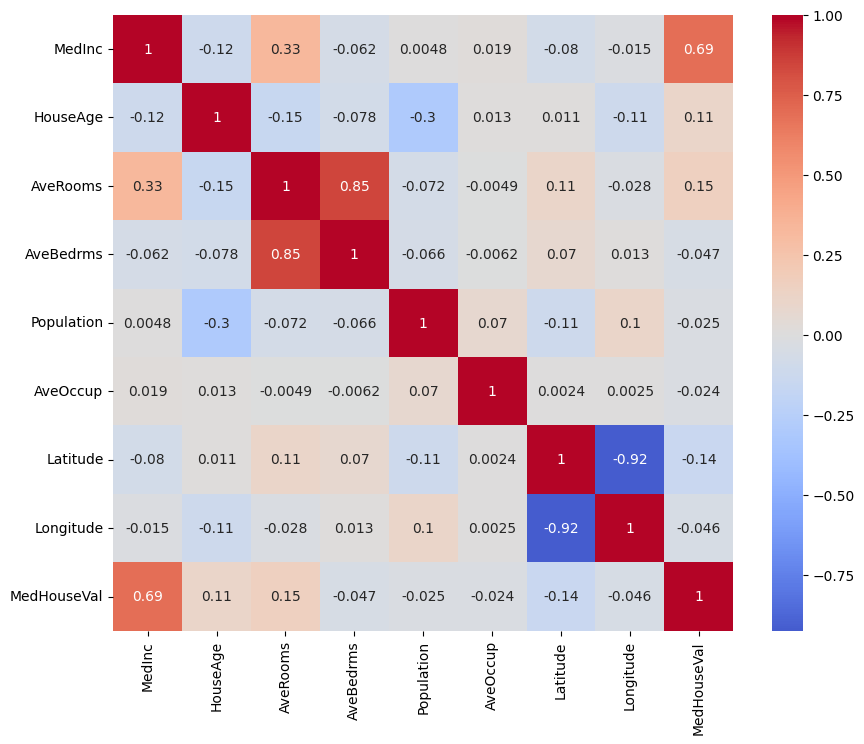

In [10]:
# Plot a correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)


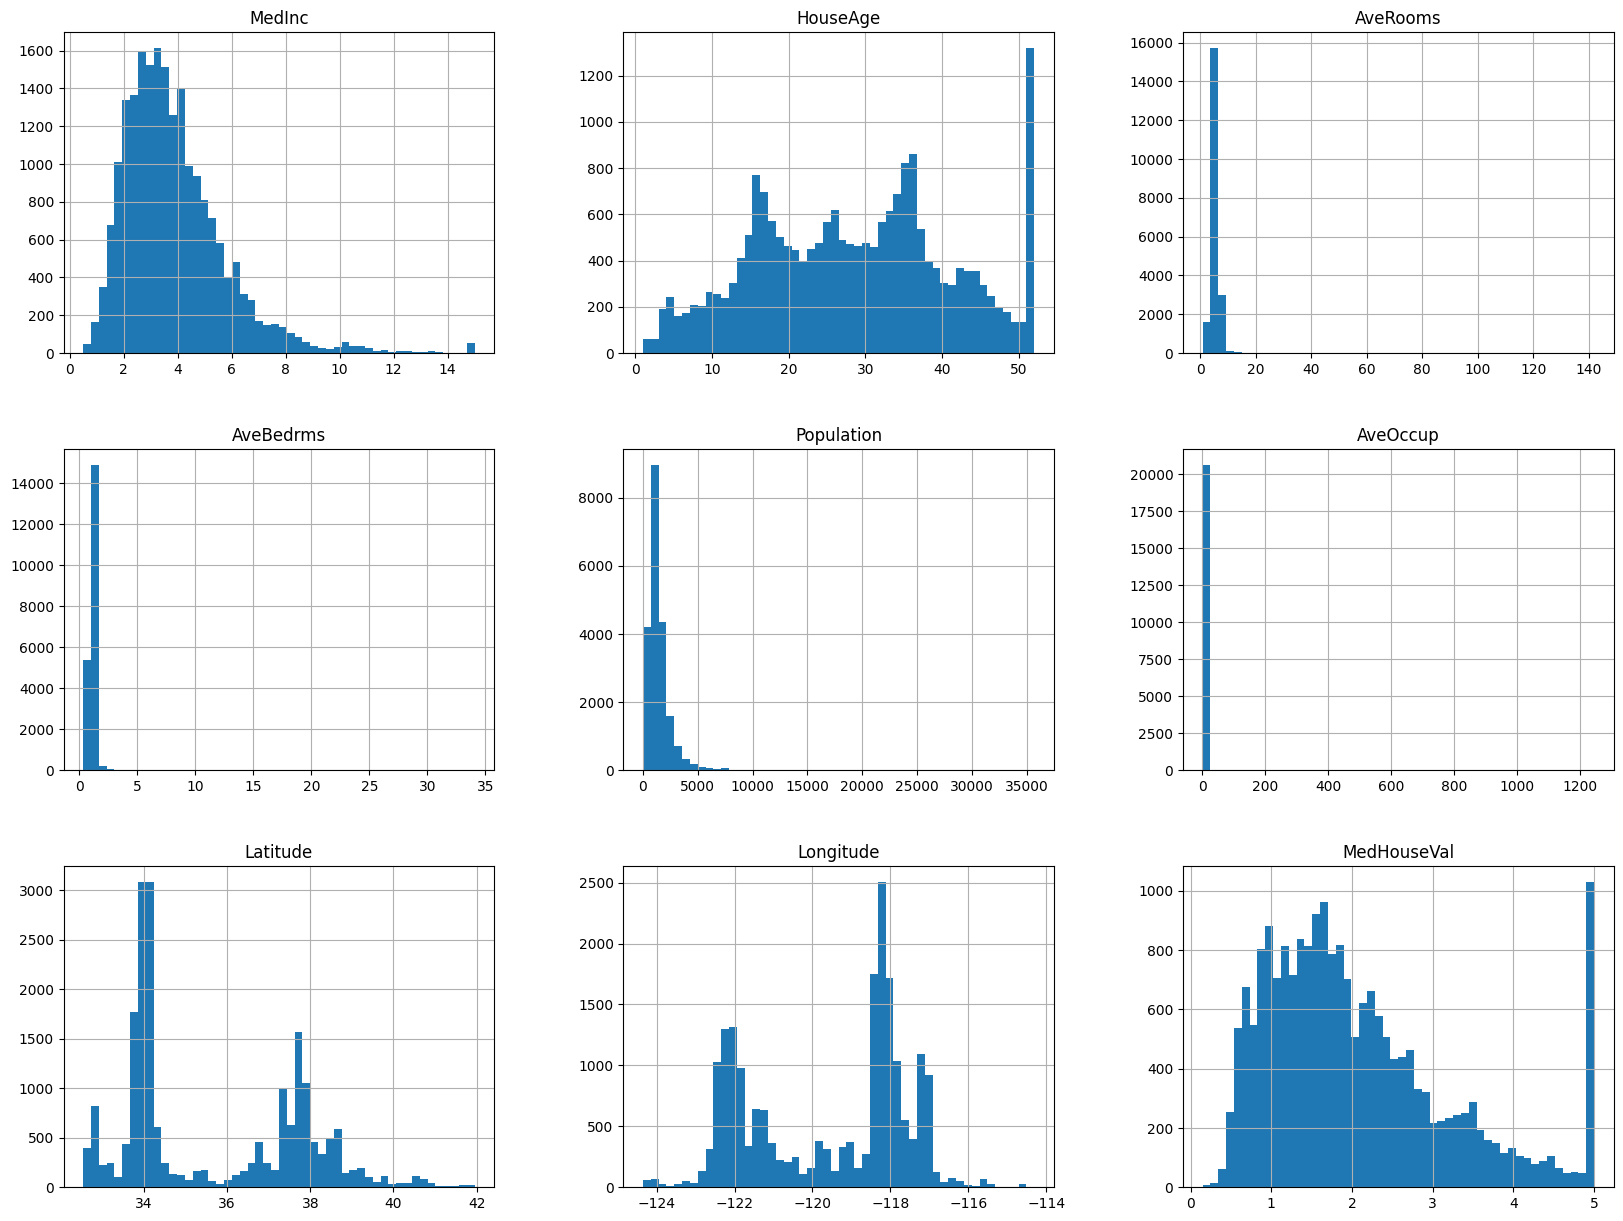

In [11]:
# Visualize the distributions of each feature
data.hist(bins=50, figsize=(20,15))
plt.show()

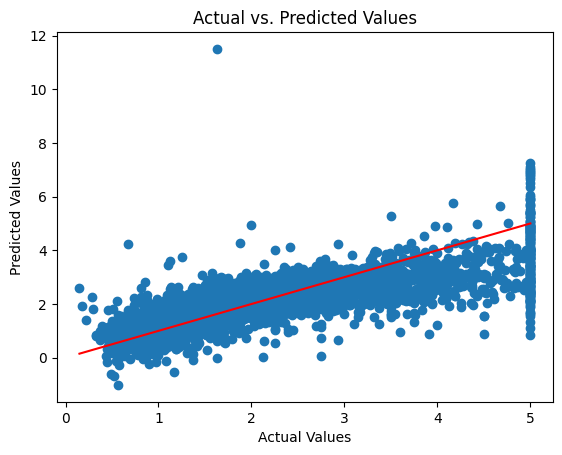

In [12]:
# Visualize the actual values versus the predicted values
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Plot a line for perfect correlation. The closer the points are to this line, the better the prediction.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()
